<a href="https://colab.research.google.com/github/PedroGabr26/BIGDATAWORLDCUP/blob/main/DashboardbigdataFIFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install plotly seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')  # Oculta alertas

In [4]:
import os

os.listdir('/content/drive/MyDrive/DASHBOARDFIFA/')
base_path = '/content/drive/MyDrive/DASHBOARDFIFA/'
# Carregar os datasets
df_matches = pd.read_csv(base_path + 'WorldCupMatches.csv')
df_cups = pd.read_csv(base_path + 'WorldCups.csv')
df_players = pd.read_csv(base_path + 'WorldCupPlayers.csv')

In [ ]:
df_matches.head(10)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
5,1930.0,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3.0,0.0,Mexico,,9249.0,1.0,0.0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201.0,1095.0,CHI,MEX
6,1930.0,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4.0,0.0,Bolivia,,18306.0,0.0,0.0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201.0,1092.0,YUG,BOL
7,1930.0,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Paraguay,,18306.0,2.0,0.0,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201.0,1097.0,USA,PAR
8,1930.0,18 Jul 1930 - 14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1.0,0.0,Peru,,57735.0,0.0,0.0,LANGENUS Jean (BEL),BALWAY Thomas (FRA),CRISTOPHE Henry (BEL),201.0,1099.0,URU,PER
9,1930.0,19 Jul 1930 - 12:50,Group 1,Estadio Centenario,Montevideo,Chile,1.0,0.0,France,,2000.0,0.0,0.0,TEJADA Anibal (URU),LOMBARDI Domingo (URU),REGO Gilberto (BRA),201.0,1094.0,CHI,FRA


In [42]:
df_time_home = df_matches.groupby(['Year','Home Team Name']).size().reset_index(name='Jogos em casa')
df_time_goals = df_matches.groupby(['Year','Home Team Name'])['Home Team Goals'].sum().reset_index(name='Gols em casa')
df_casa = pd.merge(df_time_goals,df_time_home,on=['Year','Home Team Name'])
df_casa = df_casa[df_casa['Gols em casa'] > 10]
df_casa.groupby('Year')['Gols em casa'].mean()
fig15 = px.scatter(
    df_casa,
    x='Jogos em casa',
    y='Gols em casa',
    color='Year',
    hover_name='Home Team Name',
    title='Desempenho dos times jogando em casa por edição da Copa',
    labels={
        'Jogos em casa': 'Partidas como mandante',
        'Gols em casa': 'Gols marcados em casa'
    }
)

fig15.show()

In [19]:
# df_matches['Home Team Name'].value_counts()
df_selecoes_casa = df_matches['Home Team Name'].value_counts().reset_index()
df_selecoes_casa.columns = ['Home Team Name','partidas casa']
df_selecoes_casa.head(20)
fig16 = px.bar(df_selecoes_casa,x='partidas casa',y='Home Team Name',title='Seleções que mais jogaram em casa')
fig16.show()

In [17]:
# df_matches['Home Team Name'].value_counts()
df_fora = df_matches['Away Team Name'].value_counts().reset_index()
df_fora.columns = ['Away Team Name','partidas fora']
df_fora.head(20)
fig16 = px.bar(df_fora,x='partidas fora',y='Away Team Name',title='Seleções que mais jogaram fora de casa')
fig16.show()

In [21]:
gols_casa = df_matches.groupby(['Year', 'Home Team Name'])['Home Team Goals'].sum().reset_index()
gols_casa.columns = ['Year', 'Team', 'Goals']

gols_fora = df_matches.groupby(['Year', 'Away Team Name'])['Away Team Goals'].sum().reset_index()
gols_fora.columns = ['Year', 'Team', 'Goals']

gols_total = pd.concat([gols_casa, gols_fora])
gols_total = gols_total.groupby(['Year', 'Team'])['Goals'].sum().reset_index()
gols_total = gols_total.sort_values(by=['Year', 'Goals'], ascending=[True, False])

fig17 = px.bar(gols_total, x='Team', y='Goals', color='Year',
             title='Gols por Time em Cada Copa',
             labels={'Goals': 'Gols Marcados', 'Team': 'Seleção'})
fig17.update_layout(xaxis={'categoryorder':'total descending'})
fig17.show()

In [23]:
gols_total = gols_total[gols_total['Team'] == 'Uruguay' and gols_total['Year'] == 1930]
gols_total.head()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [60]:
stadium_cities = df_matches.groupby('Stadium')['City'].agg(lambda x: x.mode().iloc[0]).reset_index()
df_estadios = df_matches['Stadium'].value_counts().reset_index()
df_estadios.columns = ['Stadium','partidas']
df_estadios = df_estadios.merge(stadium_cities,on='Stadium')

figure14 = px.treemap(df_estadios,path=['Stadium'],values='partidas',hover_name='City',title='Estádios que mais receberam partidas de copa do mundo')
figure14.show()

In [19]:
df_cups['campeao'] = df_cups['Winner'].map(df_cups['Winner'].value_counts().nlargest(20))
figure10 = px.choropleth(df_cups,locations='Winner',locationmode='country names',hover_name='Winner',hover_data=['campeao'],title='Quem tem mais tem 5',labels={'Country':'País','campeao':'Total de títulos'})
figure10.show()

In [24]:
df_cups['terceiro'] = df_cups['Third'].map(df_cups['Third'].value_counts().nlargest(20))
figure11 = px.choropleth(df_cups, locations='Third',locationmode='country names',hover_name='Third',hover_data=['terceiro'],title='Páises que ficaram em 3° lugar na copa')
figure11.show()

In [25]:
df_cups['quarto'] = df_cups['Fourth'].map(df_cups['Fourth'].value_counts().nlargest(20))
figure12 = px.choropleth(df_cups, locations='Fourth',locationmode='country names',hover_name='Fourth',hover_data=['quarto'],title='Páises que ficaram em 4° lugar na copa')
figure12.show()

PLACARES QUE MAIS SE REPETEM NA COPA DO MUNDO

In [34]:
df_matches['placar'] = df_matches['Home Team Goals'].astype(str) + ' x ' + df_matches['Away Team Goals'].astype(str)
df_matches = df_matches[df_matches['placar'] != 'nan x nan']
df_matches['contagem'] = df_matches['placar'].map(df_matches['placar'].value_counts().nlargest(20))

figure8 = px.pie(df_matches,names='placar',values='contagem',title='Placares que mais ocorrem na copa')
figure8.show()

In [12]:
df_matches_city = df_matches['City'].value_counts().reset_index()
df_matches_city.columns = ['City','Jogos']
# df_matches_city.head()
figure9 = px.treemap(df_matches_city, path=['City'],values='Jogos',title='Cidades em que ocorreram mais partidas de copa do mundo')
figure9.show()

In [16]:
df_players.head(10)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
5,201,1096,MEX,LUQUE Juan (MEX),S,0,Rafael GARZA,C,NaN
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87'
7,201,1096,MEX,LUQUE Juan (MEX),S,0,Hilario LOPEZ,NaN,NaN
8,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Etienne MATTLER,NaN,NaN
9,201,1096,MEX,LUQUE Juan (MEX),S,0,Dionisio MEJIA,NaN,NaN


In [17]:
df_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


JOGADORES COM MAIS GOLS EM COPAS

In [38]:
# Agrupa por jogador e soma os gols
goleadores = df_players[df_players['Gols'] > 0].groupby('Player Name')['Gols'].sum().reset_index()
goleadores = goleadores.sort_values(by='Gols', ascending=False).head(20)
fig7 = px.bar(
        goleadores,
        y='Player Name',
        x='Gols',
        orientation='h',
        labels={'Total de Gols': 'Gols', 'Player Name': 'Nome do Jogador'},
        title='Top 20 Maiores Goleadores da Copa do Mundo',
        # color='Total de Gols',
        # color_continuous_scale='Viridis'  # Escala de cores para destacar os maiores goleadores
    )
fig7.show()

                             Player Name  Gols
623                                KLOSE    17
926                              RONALDO    16
380                         Gerd MUELLER    13
608                        Just FONTAINE    13
846   PEL� (Edson Arantes do Nascimento)    12
1024                       Sandor KOCSIS    11
790                               M�LLER    11
401                        Grzegorz LATO    10
452                          Helmut RAHN    10
500                            JAIRZINHO     9
639                Karl-Heinz RUMMENIGGE     9
1117                                VAVA     9
865                          Paolo ROSSI     9
1105                          Uwe SEELER     9
403                    Guillermo STABILE     8
833                         Oscar MIGUEZ     8
370                         Gary LINEKER     8
10                                ADEMIR     8
253                       Diego MARADONA     8
980                         Rudi VOELLER     8


JOGADORES COM MAIS CARTÕES AMARELOS

         Player Name  Cartoes
1449  V. BRONCKHORST        6
1289  SCHWEINSTEIGER        6
202             CAFU        6
925       MASCHERANO        6
1107         PAREDES        6
321        DUARTE O.        6
1387         T SILVA        5
1371  Stefan SCHWARZ        5
1129            POPE        5
1492     W. PALACIOS        5
56           ASAMOAH        5
1187          ROBBEN        5
577         HEITINGA        5
255         COSTINHA        5
386          EMERTON        5
167       BOULAHROUZ        5
1117           PETIT        5
970          MUNTARI        5
1228  Ricardo GIUSTI        5
1167      R. MARQUEZ        5


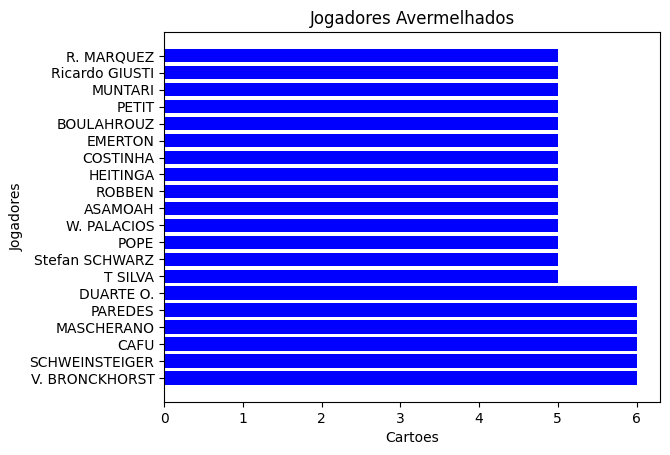

In [18]:
def contar_cartoes(evento):
  return str(evento).count('Y')

df_players['Cartoes'] = df_players['Event'].apply(contar_cartoes)
cartoes = df_players[df_players['Cartoes'] > 0][['Player Name','Cartoes']].groupby('Player Name').sum().reset_index()
cartoes = cartoes.sort_values('Cartoes',ascending=False).head(20)
# jogadoresavermelhados = cartoes['Player Name'].value_counts().reset_index()
print(cartoes)
plt.barh(cartoes['Player Name'],cartoes['Cartoes'],color='blue')
plt.xlabel('Cartoes')
plt.ylabel('Jogadores')
plt.title('Jogadores Avermelhados')
plt.show()


GRÁFICO TESTE

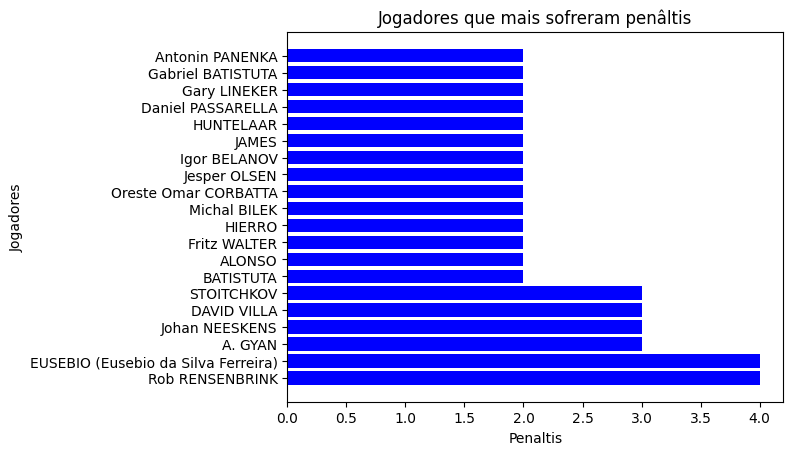

In [5]:
# criamos uma função que vai contar os jogadores que mais sofreram penaltis em copa do mundo
def contar_penaltis(evento):
  return str(evento).count('P')

# criamos uma nova coluna que vai ser criada com base na função que criamos que será usada na coluna já existente, Event
df_players['Penaltis'] = df_players['Event'].apply(contar_penaltis)
penaltis = df_players[df_players['Penaltis'] > 0][['Player Name','Penaltis']].groupby('Player Name').sum().reset_index()
penaltis = penaltis.sort_values('Penaltis',ascending=False).head(20)

plt.barh(penaltis['Player Name'],penaltis['Penaltis'],color='blue')
plt.xlabel('Penaltis')
plt.ylabel('Jogadores')
plt.title('Jogadores que mais sofreram penâltis')
plt.show()

COPAS COM MAIS GOLS

In [ ]:
df_cups['Year'] = df_cups['Year'].astype(str)
figure3 = px.bar(df_cups,x='Year',y='GoalsScored',title='Copas com mais gols',text='GoalsScored',labels={'Year':'Ano','GoalsScored':'Gols Feitos'}, hover_data=['MatchesPlayed'])
figure3.show()

In [31]:
'''df_cups['Year'] = df_cups['Year'].astype(str)
figure4 = px.line(df_cups,x='Year',y='Runners-Up',title='Copas com mais gols',text='Runners-Up',labels={'Year':'Ano','Runners-Up':'Vice-Campeão'})
figure4.show()'''


'''paises_vice = df_cups['Runners-Up'].value_counts().reset_index()
paises_vice.columns = ['Country','count']
figure4 = px.bar(paises_vice,x='count',y='Country',title='Paises com mais vice')
figure4.update_layout(
    xaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=1  # intervalo entre os ticks é 1, assim só mostra inteiros
    )
)
figure4.show()'''
df_cups['Runners-Up'].value_counts()
df_cups['vice'] = df_cups['Runners-Up'].map(df_cups['Runners-Up'].value_counts().nlargest(20))
figure4 = px.choropleth(df_cups, locations='Runners-Up',locationmode='country names',hover_name='Runners-Up',hover_data=['vice'],title='Páises que foram vices na copa')
figure4.show()

In [59]:
nome_time = df_matches.groupby('Home Team Name')['Home Team Goals'].sum().reset_index()
nome_time = nome_time.sort_values(by='Home Team Goals', ascending=False).head(20)
print(nome_time)
figure7 = px.bar(nome_time,x='Home Team Goals',y='Home Team Name')
figure7.show()

    Home Team Name  Home Team Goals
7           Brazil            180.0
2        Argentina            111.0
35           Italy             99.0
26      Germany FR             99.0
31         Hungary             73.0
25         Germany             69.0
23          France             68.0
69         Uruguay             62.0
22         England             54.0
62          Sweden             53.0
42     Netherlands             51.0
61           Spain             50.0
60    Soviet Union             43.0
71      Yugoslavia             42.0
50        Portugal             36.0
4          Austria             31.0
5          Belgium             27.0
49          Poland             27.0
18  Czechoslovakia             27.0
11           Chile             25.0


PÚBLICOS EM CADA ANO DE COPA

In [18]:
df_cups['Year'] = df_cups['Year'].astype(str) # transforma os valores da coluna "Year" em string
# df_cups['Attendance'] = df_cups['Attendance'].astype(int) # transforma os valores da coluna "Attendance" em inteiro
cup_attendance = df_cups['Attendance'].sort_values() # ordena os valores do menor para o maior
figure5 = px.bar(df_cups,x='Year', y='Attendance',title='Públicos em cada edição da copa',labels={'Year':'Ano','Attendance':'Público Total'})
figure5.update_traces(hovertemplate='Ano: %{x}<br>Público Total: %{y:,}')
figure5.show()

In [32]:
df_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,campeao,terceiro,quarto,vice
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549,2,1,2,3
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000,4,3,1,2
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700,4,2,1,2
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246,2,2,1,2
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607,3,1,3,2


In [43]:
figure13 = px.scatter(df_cups,x='MatchesPlayed',y='GoalsScored',hover_name='Year',title='Gols feitos x Jogos em cada edição de copa',labels={'GoalsScored':'Gols Feitos','MatchesPlayed':'Jogos'})
# figure13.update_traces('')
figure13.show()